## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


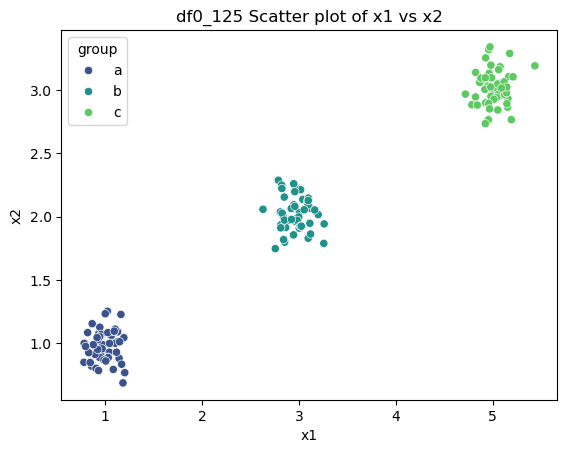

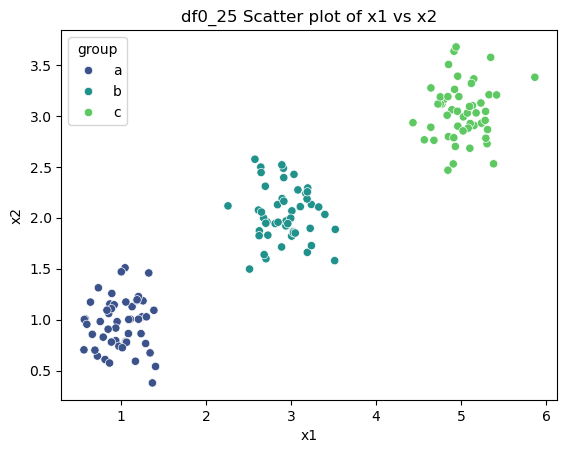

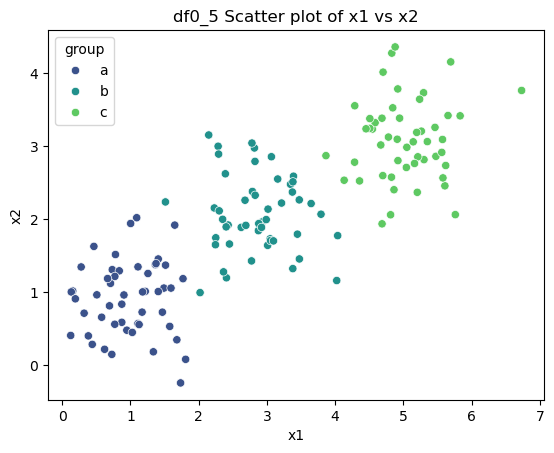

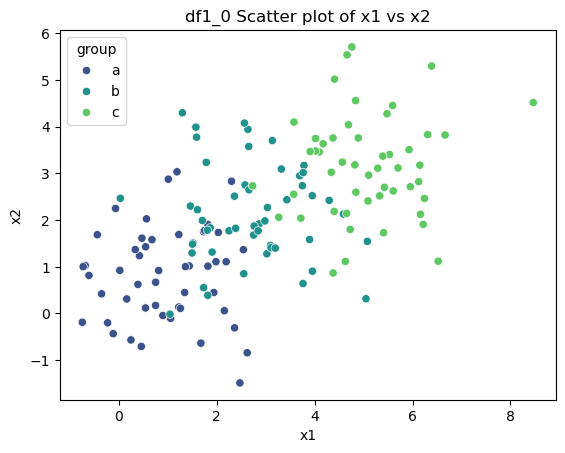

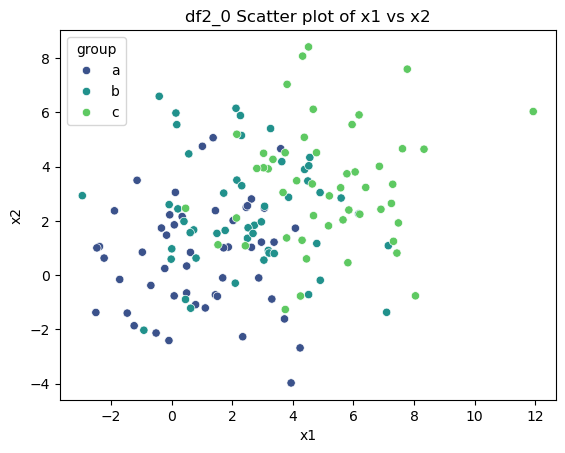

In [53]:
import matplotlib.pyplot as plt

noise=['0_125','0_25','0_5','1_0','2_0']

for i in noise:  # looping over noise levels and creating a scatterplot for corresponding dfs
    plt.figure()
    data='df'+i
    sns.scatterplot(data=locals()[data], x='x1', y='x2', hue='group', palette='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'df{i} Scatter plot of x1 vs x2')
    plt.show()

# As we increase the noise, the clusters are less distinct from each other. This makes sense, as increased standard deviation means points can deviate farther from the 
# cluster center.

          x1        x2
0   0.000000  0.061291
1   0.056226  0.091404
2   0.078001  0.072990
3   0.040235  0.078279
4   0.073387  0.122476
..       ...       ...
45  0.938056  0.830878
46  0.925755  0.877742
47  0.872387  0.826989
48  0.947792  0.783446
49  0.902050  0.880796

[150 rows x 2 columns]
          x1        x2
0   0.000000  0.098448
1   0.098631  0.146816
2   0.136828  0.117239
3   0.070579  0.125735
4   0.128734  0.196725
..       ...       ...
45  0.891338  0.728350
46  0.869760  0.803625
47  0.776143  0.722103
48  0.908418  0.652163
49  0.828179  0.808531

[150 rows x 2 columns]
          x1        x2
0   0.000000  0.141269
1   0.158339  0.210676
2   0.219660  0.168234
3   0.113305  0.180425
4   0.206666  0.282294
..       ...       ...
45  0.825557  0.610192
46  0.790916  0.718209
47  0.640625  0.601228
48  0.852976  0.500866
49  0.724163  0.725248

[150 rows x 2 columns]
          x1        x2
0   0.000000  0.180532
1   0.227070  0.269228
2   0.315009  0.214991
3   0.16

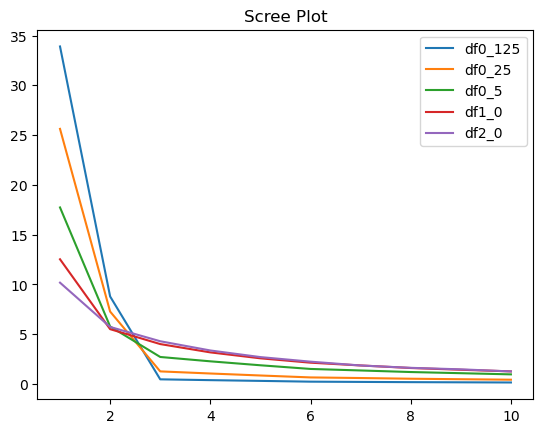

In [55]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 

## Scree plot:


def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

#['Population','unemployment','violent total','Murder','property total'] # Available vars
vars =  ['x1','x2']

k_bar = 10
for i in noise:  # looping over noise levels and creating a scatterplot for corresponding dfs
    df_name = f"df{i}"  # Name of the DataFrame
    X=locals()[df_name]
    X=X.loc[:,vars]
    X=X.apply(maxmin)
    print(X)
    SSE = [] # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the model
        SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
    scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE,label=df_name).set_title('Scree Plot') # Create scree plot

# As noise increases in the data, the scree plot becomes less useful for identifying the optimal number of clusters. With low noise, the plot shows a clear elbow 
# where the SSE drops sharply before leveling off, making it easy to choose the best k. However, as noise increases, the curve becomes smoother, and the 
# elbow point becomes harder to distinguish or may disappear entirely. This makes it difficult to determine the ideal number of clusters just by looking at the scree
# plot. In high-noise situations, relying solely on the elbow method probably isn't the best approach.

In [ ]:
# The elbow method is all about finding the point where adding more clusters stops really improving the fit of the data. In the simulation, when there’s low noise, 
# the SSE drops quickly at first, then levels off, making the elbow easy to spot. That’s where you know you’ve found the right number of clusters. But with high 
# noise, the curve just kind of flattens out, and the elbow becomes hard to find. This happens because the data is messier, so the algorithm has trouble finding 
# clear groups. In those cases, you’ll probably need to use other methods to figure out the best k.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [148]:
df=pd.read_csv('data/2022 election cycle fundraising.csv', index_col=None).drop(columns=['index'])

print(df.iloc[0].apply(type))

# looking through each entry of columns with dollar values and replacing $ and , with '' (nothing), essentially removing them
# next, changing the str values to floats for later analysis

df['Raised'] = df['Raised'].str.replace('$', '').str.replace(',','').astype(float)
df['Spent'] = df['Spent'].str.replace('$', '').str.replace( ',', '').astype(float)
df['Cash on Hand'] = df['Cash on Hand'].str.replace('$', '').str.replace( ',', '').astype(float)
df['Debts'] = df['Debts'].str.replace('$', '').str.replace( ',', '').astype(float)

df.head()


Member          <class 'str'>
Party           <class 'str'>
State           <class 'str'>
Chamber         <class 'str'>
Raised          <class 'str'>
Spent           <class 'str'>
Cash on Hand    <class 'str'>
Debts           <class 'str'>
Name: 0, dtype: object


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


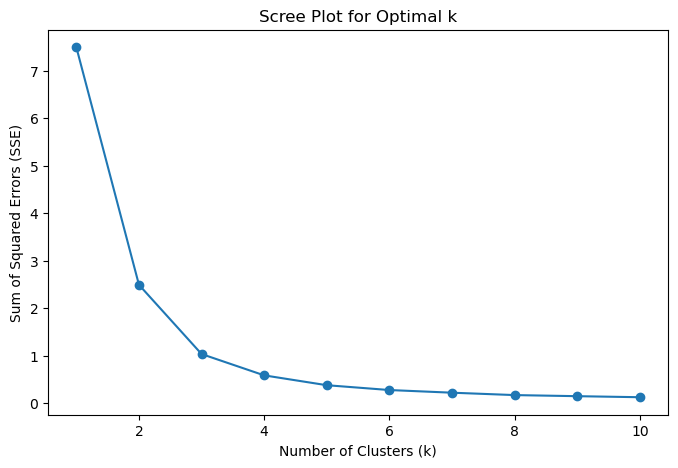

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1431: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


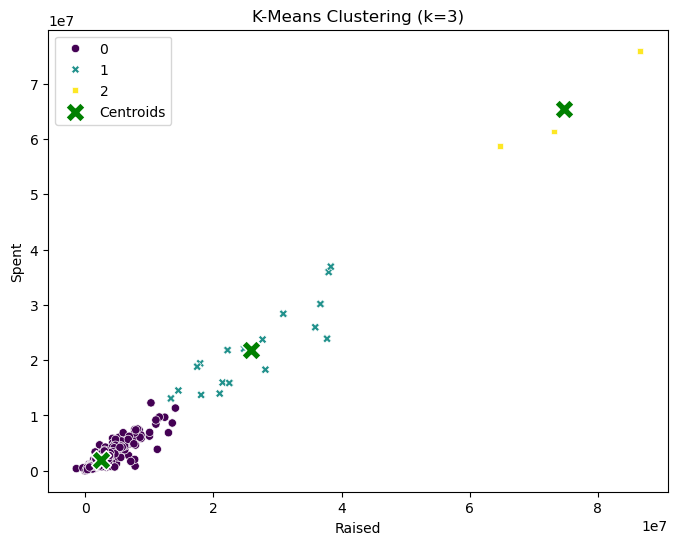

,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat,cluster
417,Raphael Warnock,Democratic,Georgia,Senate,86581469.0,75959810.0,22762985.0,0.0,2,2
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,2,2
523,Val Demings,Democratic,Florida,House,64682883.0,58806664.0,6647641.0,0.0,2,2
499,Tim Ryan,Democratic,Ohio,House,38334636.0,36909832.0,1424804.0,68075.0,1,1
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,1,1
500,Tim Scott,Republican,South Carolina,Senate,37743256.0,23876921.0,21539824.0,0.0,1,1
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,9631856.0,0.0,1,1
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,1,1
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,4813508.0,0.0,1,1
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,1,1


In [156]:
# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

min_raised = min(df.loc[:,'Raised']) # I'm putting these aside to rescale values later
max_raised = max(df.loc[:,'Raised'])
min_spent = min(df.loc[:,'Spent'])
max_spent = max(df.loc[:,'Spent'])

comp1 = df.loc[ : , ['Raised','Spent'] ] # Select data to cluster
comp1 = comp1.apply(maxmin)
comp1.head()

SSE = []
k_values = range(1, 11)  # try different cluster sizes

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(comp1)
    SSE.append(model.inertia_)

# Plot Scree Plot (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, SSE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Scree Plot for Optimal k')
plt.show()


np.random.seed(10)

initial_centroids = np.random.randint(low=0, high=comp1.shape[0], size=3)  # Randomly select 3 points
model = KMeans(n_clusters=3, max_iter=300, n_init=10, init=comp1.iloc[initial_centroids, :], random_state=0)
model.fit(comp1)
df['g_hat'] = model.predict(comp1)
centers = model.cluster_centers_

centroid_raised = centers[:, 0] * (max_raised - min_raised) + min_raised
centroid_spent = centers[:, 1] * (max_spent - min_spent) + min_spent

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='g_hat', style='g_hat', palette='viridis')
sns.scatterplot(x=centroid_raised, y=centroid_spent, color='green', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()

df['cluster'] = model.labels_
cluster_sizes = df['cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2)
smallest_cluster_labels = smallest_clusters.index
smallest_cluster_politicians = df[df['cluster'].isin(smallest_cluster_labels)]
sorted_smallest_cluster_politicians = smallest_cluster_politicians.sort_values(by='Raised', ascending=False)
sorted_smallest_cluster_politicians.head(20)

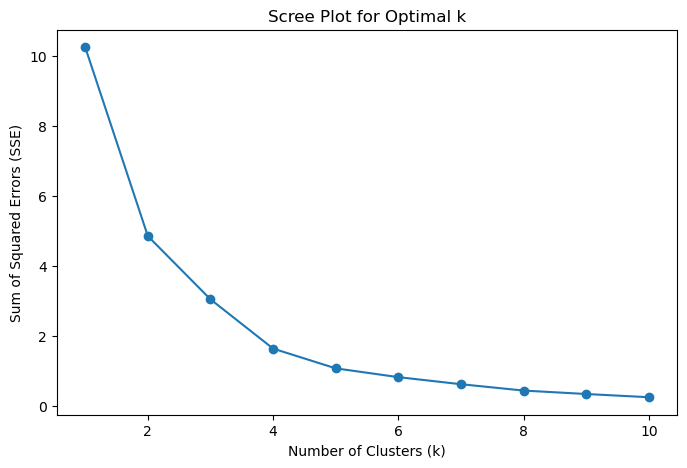

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1431: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


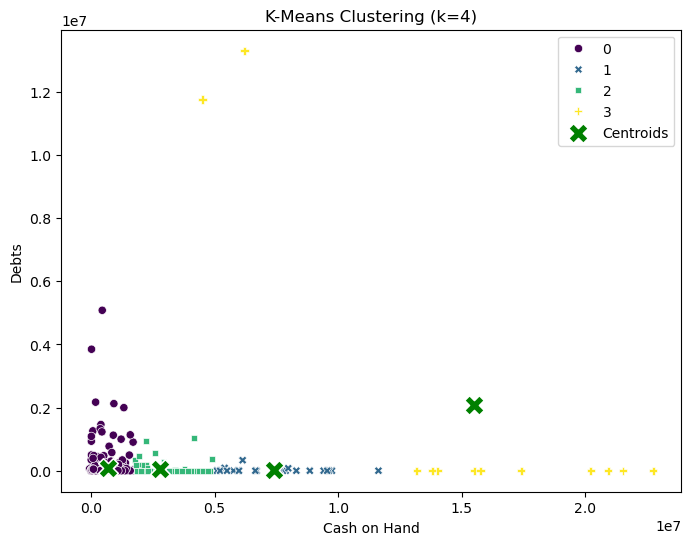

In [160]:
# Max-min scaler function:
def maxmin(x):  # Max-min scaler function
    x = (x - min(x)) / (max(x) - min(x))
    return x

# Store min and max values for later rescaling
min_cash = min(df.loc[:, 'Cash on Hand'])
max_cash = max(df.loc[:, 'Cash on Hand'])
min_debts = min(df.loc[:, 'Debts'])
max_debts = max(df.loc[:, 'Debts'])

# Select data to cluster
comp1 = df.loc[:, ['Cash on Hand', 'Debts']]
comp1 = comp1.apply(maxmin)
comp1.head()

# Scree plot (Elbow Method) to determine optimal k
SSE = []
k_values = range(1, 11)  # Trying different cluster sizes

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(comp1)
    SSE.append(model.inertia_)

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, SSE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Scree Plot for Optimal k')
plt.show()

# K-Means Clustering with k=4
np.random.seed(10)
initial_centroids = np.random.randint(low=0, high=comp1.shape[0], size=4)  # Randomly select 4 points

model = KMeans(n_clusters=4, max_iter=300, n_init=10, init=comp1.iloc[initial_centroids, :], random_state=0)
model.fit(comp1)

df['g_hat'] = model.predict(comp1)
centers = model.cluster_centers_

# Re-normalize the centers to original scale
centroid_cash = centers[:, 0] * (max_cash - min_cash) + min_cash
centroid_debts = centers[:, 1] * (max_debts - min_debts) + min_debts

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='g_hat', style='g_hat', palette='viridis')
sns.scatterplot(x=centroid_cash, y=centroid_debts, color='green', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=4)')
plt.legend()
plt.show()

# There is a much less distinct correlation here, but it doesnt surprise me. It makes sense that those with a lot of cash on hand did not need to take out
# any loans and therefore would not accumulate any debt. It does surprise me a bit that the largest cluster contains those who have debt.

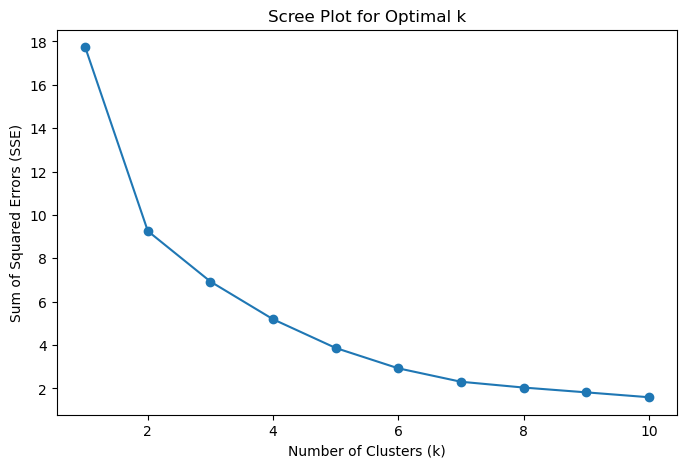

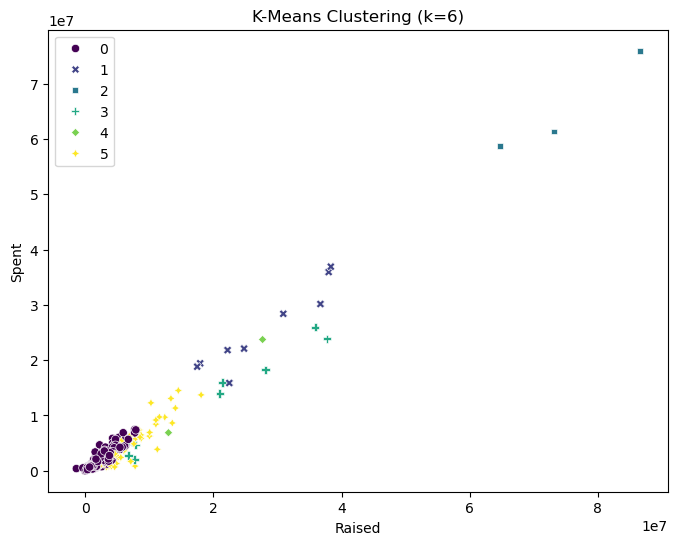

In [174]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Max-min scaler function:
def maxmin(x):  
    return (x - x.min()) / (x.max() - x.min())

# Select numeric variables for clustering
comp1 = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].apply(maxmin)

# Determine optimal k using the Scree plot (Elbow Method)
SSE = []
k_values = range(1, 11)  # Try different cluster sizes

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(comp1)
    SSE.append(model.inertia_)

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, SSE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Scree Plot for Optimal k')
plt.show()

# K-Means Clustering with chosen k
optimal_k = 6  # Set based on elbow method
model = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
df['g_hat'] = model.fit_predict(comp1)  # Fit model and assign cluster labels

# Scatter plot for visualization (using Raised vs Spent)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='g_hat', style='g_hat', palette='viridis')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.show()

# I think this worked a lot better, it seems there are clearer distinctions. I am guessing that the optimal k is 6 but I am not 100% confident.
# This definitely brought to my attention that the highest spenders in the election were often the ones that had close races.


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?